# Task 1 - Develop a machine learning mode

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
RecentOrders = pd.read_excel('RecentOrders.xlsx')


In [2]:
dfX= RecentOrders.drop(columns = ['Status'])
sy= RecentOrders.Status
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy)
dfX_train, dfX_test, sy_train, sy_test

(     Price per unit  Qty. of items ordered    Sales
 67            89.32                     23  5372.57
 103          151.00                     45  6683.34
 83            44.51                     40  8892.90
 53            94.74                     29  6075.30
 94            96.34                     38  4860.24
 ..              ...                    ...      ...
 4             75.40                     41  3746.70
 79            32.30                     27  1451.00
 27            94.74                     22  6000.40
 102           57.60                     29  2871.00
 1             68.92                     47  8014.82
 
 [78 rows x 3 columns],
      Price per unit  Qty. of items ordered    Sales
 7             78.90                     29  8014.82
 26            86.32                     47  8065.89
 50           130.00                     37  5205.27
 13            68.98                     31  3307.77
 64            45.60                     48  5016.83
 81            78.80

In [3]:
le=preprocessing.LabelEncoder()
le

LabelEncoder()

In [4]:
le=le.fit(sy_train)
le.classes_

array([0, 1])

In [5]:
y_train=le.transform(sy_train)
sy_train, y_train

(67     0
 103    1
 83     0
 53     1
 94     1
       ..
 4      1
 79     0
 27     1
 102    0
 1      0
 Name: Status, Length: 78, dtype: int64,
 array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]))

In [6]:
dfX_train.to_numpy()

array([[   89.32,    23.  ,  5372.57],
       [  151.  ,    45.  ,  6683.34],
       [   44.51,    40.  ,  8892.9 ],
       [   94.74,    29.  ,  6075.3 ],
       [   96.34,    38.  ,  4860.24],
       [   89.9 ,    48.  ,  1329.9 ],
       [   98.65,    45.  ,  2333.12],
       [   87.98,    32.  ,  5176.38],
       [   81.35,    27.  ,  4177.35],
       [  169.  ,    39.  ,  2990.13],
       [   76.  ,    23.  ,  3676.76],
       [   98.57,    24.  ,  7136.19],
       [  101.23,    45.  ,  3176.  ],
       [   94.64,    39.  ,  5887.35],
       [  104.56,    35.  ,  7078.23],
       [   98.8 ,    41.  ,  3003.  ],
       [  106.78,    47.  ,  6120.34],
       [   78.4 ,    30.  ,  3944.7 ],
       [   70.98,    45.  ,  7737.93],
       [   54.8 ,    27.  ,  2765.9 ],
       [   94.74,    50.  ,  6901.92],
       [   51.15,    32.  ,  2597.39],
       [   52.43,    42.  , 10172.7 ],
       [  198.2 ,    49.  ,  8254.8 ],
       [   89.76,    39.  ,  7680.64],
       [   59.9 ,    42. 

In [7]:
n1= preprocessing.MinMaxScaler()
n1=n1.fit(dfX_train.to_numpy())
X_train = n1.transform(dfX_train.to_numpy())
X_train

array([[0.34370102, 0.06521739, 0.37884286],
       [0.71549126, 0.54347826, 0.50167649],
       [0.07359855, 0.43478261, 0.70873668],
       [0.37637131, 0.19565217, 0.44469642],
       [0.38601567, 0.39130435, 0.33083187],
       [0.34719711, 0.60869565, 0.        ],
       [0.39993972, 0.54347826, 0.0940128 ],
       [0.33562387, 0.26086957, 0.36045768],
       [0.29566004, 0.15217391, 0.26683753],
       [0.82399036, 0.41304348, 0.1555819 ],
       [0.26341169, 0.06521739, 0.21992672],
       [0.3994575 , 0.08695652, 0.54411354],
       [0.41549126, 0.54347826, 0.17299997],
       [0.37576854, 0.41304348, 0.42708343],
       [0.43556359, 0.32608696, 0.53868205],
       [0.40084388, 0.45652174, 0.15678796],
       [0.44894515, 0.58695652, 0.44891717],
       [0.27787824, 0.2173913 , 0.24503566],
       [0.2331525 , 0.54347826, 0.60050323],
       [0.13562387, 0.15217391, 0.13456907],
       [0.37637131, 0.65217391, 0.52215985],
       [0.11362266, 0.26086957, 0.11877782],
       [0.

In [8]:
X_train.shape

(78, 3)

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn=knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_test= le.transform(sy_test.to_numpy())
sy_test, y_test

(7      0
 26     1
 50     1
 13     0
 64     1
 81     0
 91     0
 5      1
 57     1
 43     0
 0      1
 20     1
 22     1
 65     1
 55     0
 75     1
 30     0
 24     0
 71     0
 46     0
 16     1
 31     1
 101    1
 63     0
 39     1
 88     0
 Name: Status, dtype: int64,
 array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0]))

In [11]:
X_test=n1.transform(dfX_test.to_numpy())
dfX_test, X_test

(     Price per unit  Qty. of items ordered    Sales
 7             78.90                     29  8014.82
 26            86.32                     47  8065.89
 50           130.00                     37  5205.27
 13            68.98                     31  3307.77
 64            45.60                     48  5016.83
 81            78.80                     20  4043.96
 91            79.40                     23  4140.23
 5             22.00                     42  5404.62
 57            89.00                     37  8714.70
 43            43.40                     24  2225.50
 0            104.56                     41  7023.98
 20           141.00                     36  6065.55
 22            86.57                     45  9064.89
 65           100.00                     40  9774.03
 55            91.00                     33  5756.52
 75            34.67                     39  2168.54
 30           120.50                     34  3757.26
 24            78.65                     23  3

In [12]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1])

In [13]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0])

In [14]:
knn.score(X_test, y_test)

0.8076923076923077

In [15]:
knn.score(X_train, y_train)

1.0

# Task 2 - Doing some analysis to find best value of k

In [16]:
n=1
xaxis = []
yaxis_testmn=[]
yaxis_trainmn=[]
for n in range(1, 20):
    ln = KNeighborsClassifier(n_neighbors=n)
    ln=ln.fit(X_train, y_train)
    y_test = le.transform(sy_test.to_numpy())
    x_test = n1.transform(dfX_test.to_numpy())
    yaxis_testmn.append(ln.score(X_test,y_test))
    yaxis_trainmn.append(ln.score(X_train,y_train))
    xaxis.append(n)

In [17]:
n=1
n1=preprocessing.StandardScaler()
n1=n1.fit(dfX_train.to_numpy())
X_train = n1.transform(dfX_train.to_numpy())
xaxis=[]
yaxis_testss=[]
yaxis_trainss=[]
for n in range(1, 20):
    ln = KNeighborsClassifier(n_neighbors=n)
    ln=ln.fit(X_train, y_train)
    y_test = le.transform(sy_test.to_numpy())
    x_test = n1.transform(dfX_test.to_numpy())
    yaxis_testss.append(ln.score(X_test,y_test))
    yaxis_trainss.append(ln.score(X_train,y_train))
    xaxis.append(n)

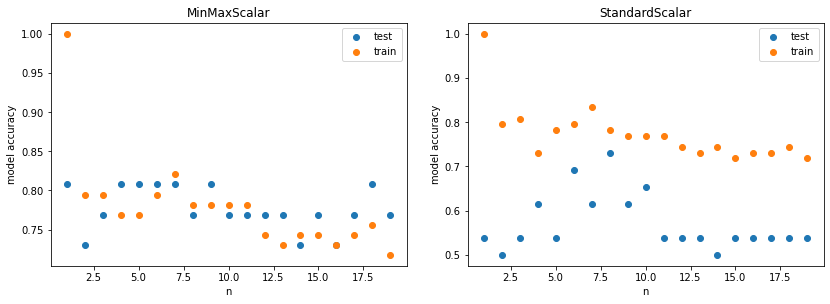

In [18]:
fig, axs = plt.subplots(figsize = (12,4.5))
axis_1=plt.subplot2grid(shape=(1,2), loc = (0,0))
axis_2=plt.subplot2grid(shape=(1,2), loc = (0,1))
plt.tight_layout(pad=3)


axis_1.scatter(xaxis, yaxis_testmn, label='test')
axis_1.scatter(xaxis, yaxis_trainmn, label='train')
axis_1.set_xlabel('n')
axis_1.set_ylabel('model accuracy')
axis_1.legend()
axis_1.title.set_text('MinMaxScalar')

axis_2.scatter(xaxis, yaxis_testss, label='test')
axis_2.scatter(xaxis, yaxis_trainss, label='train')
axis_2.set_xlabel('n')
axis_2.set_ylabel('model accuracy')
axis_2.legend()
axis_2.title.set_text('StandardScalar')

plt.show()

# Task 3 - Finding best value of k

a) Best k value for train is 1.0 and its is in both MinMaxScalar and StandardScalar
 however for test is 4 and that is in MinMaxScalar 

Confusion matrix, without normalization
[[ 0 12]
 [ 0 14]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


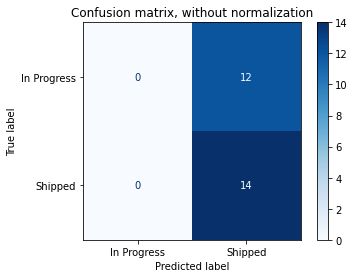

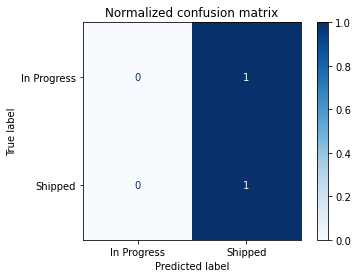

In [19]:
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)
class_names = ['In Progress', 'Shipped']
np.set_printoptions(precision=2)
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0])

# Task 4 - Apply your model

In [21]:
new_example_rawdata = np.array([[130.52,52,5206.78]])
X_new=n1.transform(new_example_rawdata)
X_new

array([[ 1.47,  1.66, -0.04]])

In [22]:
knn.predict(X_new)

array([1])

In [23]:
le.inverse_transform(knn.predict(X_new))

array([1])